In [1]:
import pandas as pd
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\SVM\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
df["age"].unique().sort()

In [3]:
df["deposit"].value_counts() #label encoding

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [4]:
df["loan"].value_counts()  #label encoding

loan
no     9702
yes    1460
Name: count, dtype: int64

In [5]:
df["housing"].value_counts()  #label encoding

housing
no     5881
yes    5281
Name: count, dtype: int64

In [6]:
df["default"].value_counts()  #label encoding

default
no     10994
yes      168
Name: count, dtype: int64

In [7]:
df["contact"].value_counts()   #one hot encoding

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [8]:
df["poutcome"].value_counts()  #ohe

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [9]:
df["education"].value_counts()  #ohe

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [10]:
df["marital"].value_counts()        #ohe

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [11]:
df.shape

(11162, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='deposit'>

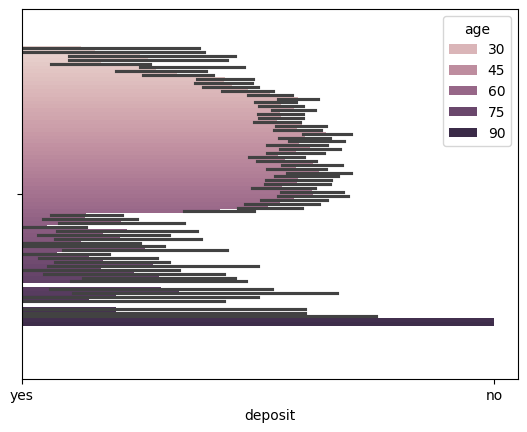

In [15]:
import seaborn as sns
sns.barplot(x="deposit",hue="age",data=df)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [17]:
label_enc_cols=df[["default","housing","loan","deposit"]]
label_enc_cols

,default,housing,loan,deposit
0,no,yes,no,yes
1,no,no,no,yes
2,no,yes,no,yes
3,no,yes,no,yes
4,no,no,no,yes
...,...,...,...,...
11157,no,yes,no,no
11158,no,no,no,no
11159,no,no,no,no
11160,no,no,yes,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df["default"]=label_enc.fit_transform(df["default"])
df["loan"]=label_enc.fit_transform(df["loan"])
df["housing"]=label_enc.fit_transform(df["housing"])
df["deposit"]=label_enc.fit_transform(df["deposit"])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [21]:
df.drop(["day","month"],axis=1,inplace=True)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,673,2,-1,0,unknown,1


In [31]:
cols=["job","marital","education","contact","poutcome"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoder=ohe.fit_transform(df[cols])
encoder.get

In [37]:
df(encoder, columns=encoder.get_feature_names_out(cols))

AttributeError: 'csr_matrix' object has no attribute 'get_feature_names_out'